# Gaussian naive bayes


Naive Bayes is a conditional probability model where were trying to predict a class C form k classes (C1, C2 ... C<sub>k</sub>) given n features (x1 .... xn) so it boils down to C<sub>k</sub>|(x1,x2 .... xn)

The problem with this is if the number of features n is large is infeasible 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.DataFrame()

# Create our target variable
data['Fruit'] = ['pineapple','pineapple','pineapple','pineapple','watermelon','watermelon','watermelon','watermelon']

# Create our feature variables
data['Height'] = [2,2.2,2.2,2.3,2.2,2.3,2.4,2.5]
data['Mass'] = [12,14,15,11,22,19,16,15]
data['Width'] = [0.5,0.6,0.55,0.7,1,1.2,1.4,1.3]

# View the data
data


,Fruit,Height,Mass,Width
0,pineapple,2.0,12,0.50
1,pineapple,2.2,14,0.60
2,pineapple,2.2,15,0.55
3,pineapple,2.3,11,0.70
4,watermelon,2.2,22,1.00
5,watermelon,2.3,19,1.20
6,watermelon,2.4,16,1.40
7,watermelon,2.5,15,1.30


In [3]:
#lets predict the fruit based on a new set of unseen features 

test = [2.3,18,0.65]

If we look at bayes theorm it's 

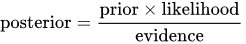

if we expand that its 
P(class|data) = (P(data|class) * P(class)) / P(data) 


Assumptions 

1) each feautre is independent of each other 

2) values of these features are normally distributed

# Priors

In [11]:
counts = data['Fruit'].value_counts()
p_counts = counts['pineapple']
w_counts = counts['watermelon']
total = data['Fruit'].count()


In [12]:
P_pineapple = p_counts/total
P_watermelon = w_counts/total

# Likelihood

each term in our likelihood is assumed to be normal distribution


In [14]:
data_means = data.groupby('Fruit').mean()

# View the values
data_means

,Height,Mass,Width
Fruit,,,
pineapple,2.175,13,0.5875
watermelon,2.350,18,1.2250


In [15]:
data_variance = data.groupby('Fruit').var()

# View the values
data_variance

,Height,Mass,Width
Fruit,,,
pineapple,0.015833,3.333333,0.007292
watermelon,0.016667,10.000000,0.029167


In [26]:
pineapple_height_mean,pineapple_mass_mean,pineapple_width_mean = data_means.iloc[0]
watermelon_height_mean,watermelon_mass_mean,watermelon_width_mean = data_means.iloc[1]


pineapple_height_variance,pineapple_mass_variance,pineapple_width_variance = data_variance.iloc[0]
watermelon_height_variance,watermelon_mass_variance,watermelon_width_variance = data_variance.iloc[1]

In [27]:
def p_x_given_y(x, mean_y, variance_y):

    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    
    return p


# Apply Bayes Classifier To New Data Point

In [32]:
pineapple_classification = P_pineapple * \
p_x_given_y(test[0], pineapple_height_mean, pineapple_height_variance) * \
p_x_given_y(test[1], pineapple_mass_mean, pineapple_mass_variance) * \
p_x_given_y(test[2], pineapple_width_mean, pineapple_width_variance)


In [31]:
watermelon_classification = P_watermelon * \
p_x_given_y(test[0], watermelon_height_mean, watermelon_height_variance) * \
p_x_given_y(test[1], watermelon_mass_mean, watermelon_mass_variance) * \
p_x_given_y(test[2], watermelon_width_mean, watermelon_width_variance)


In [33]:
if pineapple_classification > watermelon_classification:
    print("Pineapple")
else:
    print("Watermelon")

Pineapple
